In [1]:
import numpy as np
import matplotlib.pyplot as plt

def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

/tmp/ipykernel_318812/2510266705.py:26: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
/tmp/ipykernel_318812/2510266705.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))


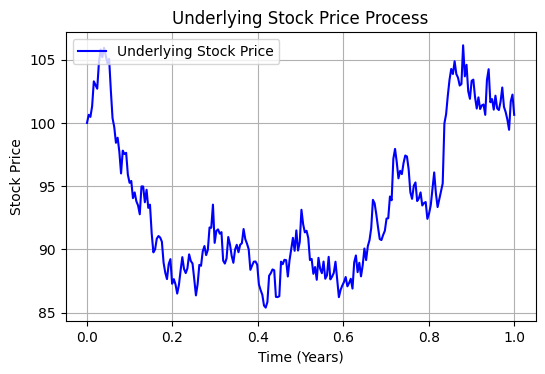

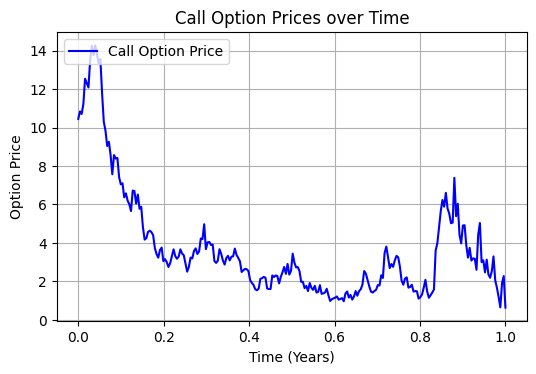

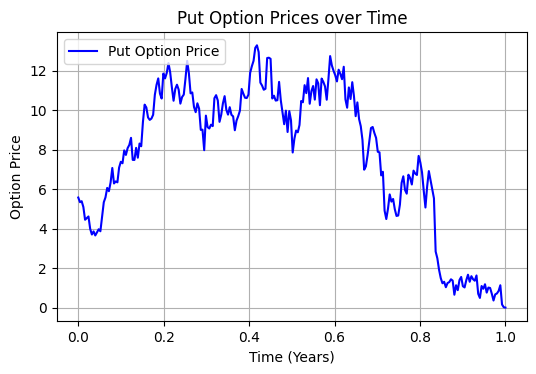

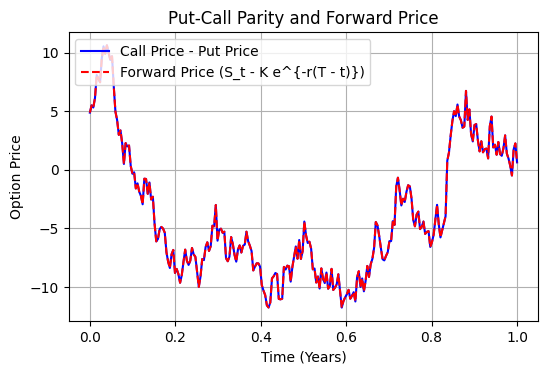

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100  # initial stock price
K = 100   # strike price
r = 0.05  # risk-free rate
T = 1     # time to maturity
sigma = 0.2  # volatility
num_steps = 252  # number of time steps (daily data for 1 year)
np.random.seed(42)

# Simulate the underlying stock price using GBM
dt = T / num_steps
time = np.linspace(0, T, num_steps)
S = np.zeros(num_steps)
S[0] = S0

for t in range(1, num_steps):
    Z = np.random.standard_normal()
    S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

# Black-Scholes formula
def black_scholes_call(S, K, T, r, sigma, t):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    call = S * norm.cdf(d1) - K * np.exp(-r * (T - t)) * norm.cdf(d2)
    return call

def black_scholes_put(S, K, T, r, sigma, t):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t))
    d2 = d1 - sigma * np.sqrt(T - t)
    put = K * np.exp(-r * (T - t)) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put

# Calculate option prices and forward price over time
call_prices_over_time = [black_scholes_call(S[t], K, T, r, sigma, time[t]) for t in range(num_steps)]
put_prices_over_time = [black_scholes_put(S[t], K, T, r, sigma, time[t]) for t in range(num_steps)]
call_minus_put_over_time = [call_prices_over_time[t] - put_prices_over_time[t] for t in range(num_steps)]
forward_prices_over_time = [S[t] - K * np.exp(-r * (T - time[t])) for t in range(num_steps)]

# Plotting Underlying Stock Price Process
plt.figure(figsize=figsize(1.0))
plt.plot(time, S,'b', label='Underlying Stock Price')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.title('Underlying Stock Price Process')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Figures/stock_price_process.pdf')
plt.show()

# Plotting Call Option Prices over time
plt.figure(figsize=figsize(1.0))
plt.plot(time, call_prices_over_time,'b', label='Call Option Price')
plt.xlabel('Time (Years)')
plt.ylabel('Option Price')
plt.title('Call Option Prices over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Figures/call_option_prices.pdf')
plt.show()

# Plotting Put Option Prices over time
plt.figure(figsize=figsize(1.0))
plt.plot(time, put_prices_over_time,'b', label='Put Option Price')
plt.xlabel('Time (Years)')
plt.ylabel('Option Price')
plt.title('Put Option Prices over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Figures/put_option_prices.pdf')
plt.show()

# Plotting Put-Call Parity with overlayed prices and strike price over time
plt.figure(figsize=figsize(1.0))
plt.plot(time, call_minus_put_over_time,'b', label='Call Price - Put Price')
plt.plot(time, forward_prices_over_time, 'r--', label='Forward Price (S_t - K e^{-r(T - t)})')
plt.xlabel('Time (Years)')
plt.ylabel('Option Price')
plt.title('Put-Call Parity and Forward Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('Figures/put_call_parity.pdf')
plt.show()
